In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

# Remove outliar function

In [2]:
#Remove outliars(dataframe , role with outliars)
def RemoveOutLiars(data , rolename):
    Q1 = data[rolename].quantile(0.25) #Q1
    Q3 = data[rolename].quantile(0.75) #Q3
    IQR = Q3 - Q1 #IQR = Q3 - Q1
    count = 0

    tempList = [] #empty list to sort index

    #loop through list to find outliars
    for entry in data[rolename].values.tolist():
        if((entry < (Q1 - 1.5 * IQR)) or  (entry > (Q3 + 1.5 * IQR))):
            #append index
            tempList.append(count)
        count += 1
    
    #return removed list
    return data.drop(tempList)

# Split data to 7:3

In [3]:
from sklearn.model_selection import train_test_split

file = pd.read_csv('GameData.csv' ,dtype = {'name': str,'owners':int,'developer ' : str,'positive':int ,'publisher':str , 'price ':float ,'initialprice ':float }, header=0 , keep_default_na=False , encoding='ANSI')

# split into train and test sets
train, test = train_test_split(file, test_size=0.3, random_state=1)

# summarize
print('Train', test.shape)
print('Test', train.shape)

Train (12692, 36)
Test (29612, 36)


# Display all column names 

In [4]:
list(file.columns.values)

['appid',
 'name',
 'developer',
 'publisher',
 'score_rank',
 'positive',
 'negative',
 'userscore',
 'owners',
 'average_forever',
 'average_2weeks',
 'median_forever',
 'median_2weeks',
 'price',
 'initialprice',
 'discount',
 'ccu',
 'languages',
 'genre',
 'tags',
 'genre1',
 'genre2',
 'genre3',
 'genre4',
 'genre5',
 'genre6',
 'genre7',
 'english',
 'chinese',
 'french',
 'german',
 'italian',
 'spanish',
 'total_lang',
 'lang_collection',
 'owner_cat']

In [5]:
#temp DF
owners = pd.DataFrame(file[['price' , 'owner_cat']])

<AxesSubplot:xlabel='owner_cat'>

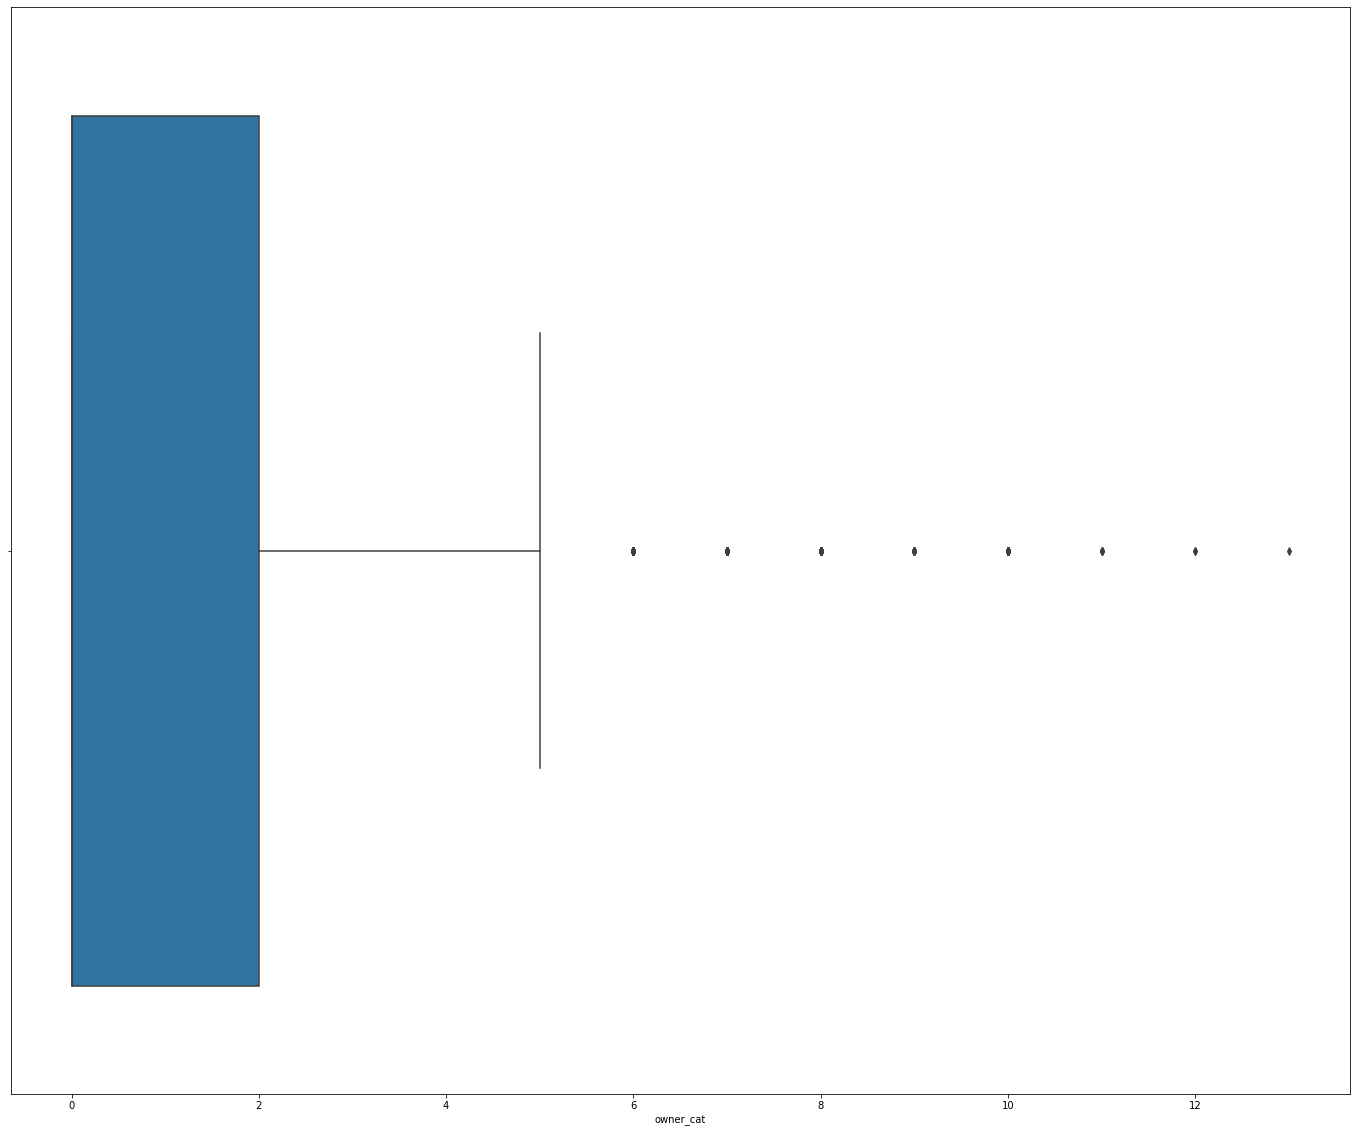

In [15]:
f = plt.figure(figsize=(24,20))
sb.boxplot(x = 'owner_cat' , data= owners)

#### 

TypeError: boxplot() got an unexpected keyword argument 'height'

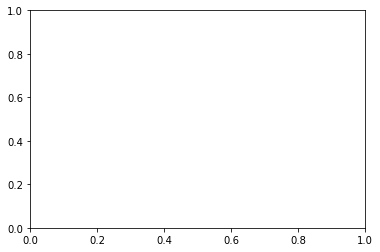

In [22]:
owners = pd.DataFrame(file[['price' , 'owner_cat']])

sb.boxplot(y = 'price' , x = 'owner_cat' , data= owners, height= 24)

<AxesSubplot:xlabel='price', ylabel='owner_cat'>

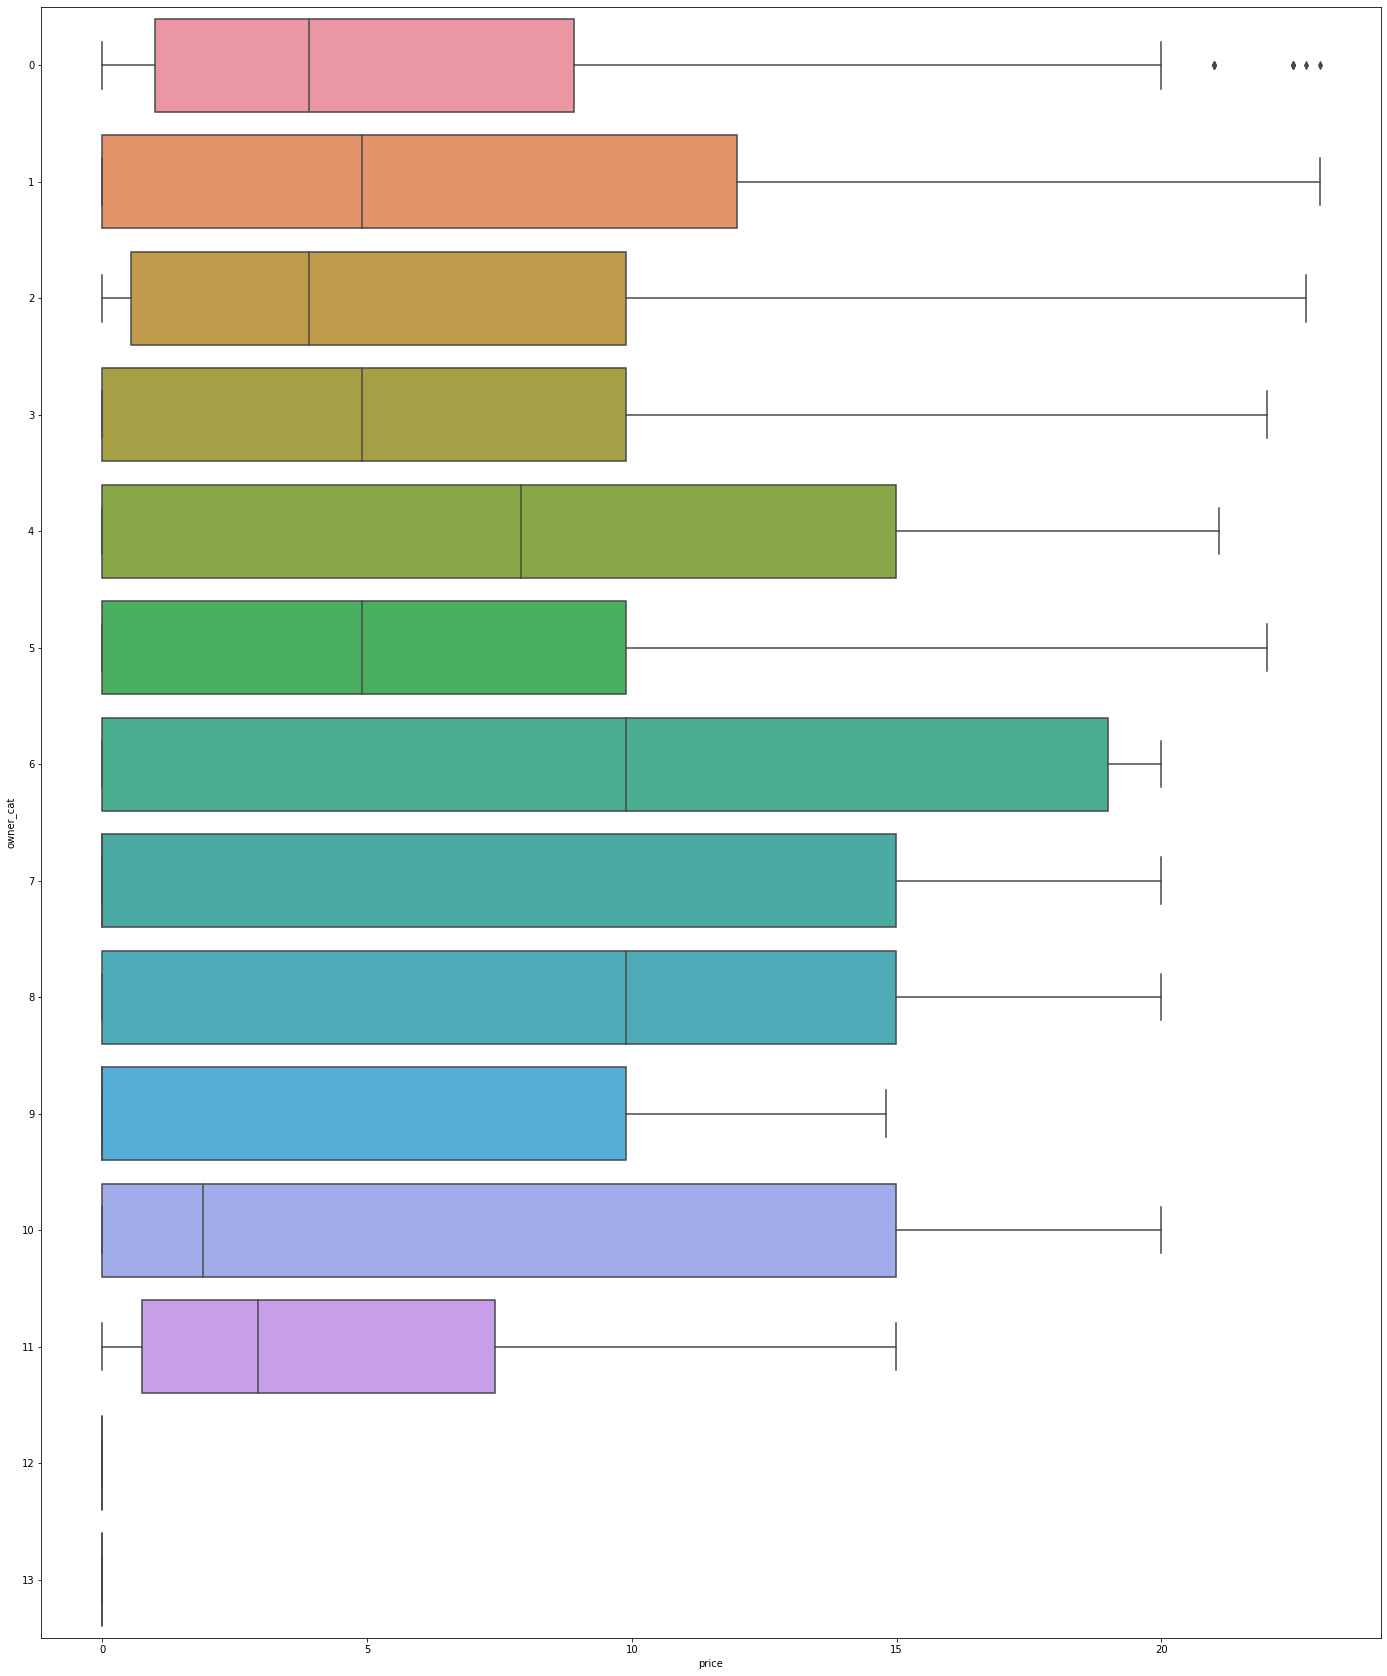

In [21]:
owners_clean = RemoveOutLiars(owners,'price')

f = plt.figure(figsize=(24,30))
sb.boxplot(x = 'price' , y = 'owner_cat' , orient='h' , data= owners_clean)

# Test

In [9]:
df = pd.read_csv('GameData_test.csv' , header=0 , keep_default_na=False , encoding='ANSI')

data_pre = {}

# split data
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(df, test_size=0.2)

In [10]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('output')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [11]:
#numerical feature
#positive = feature_column.numeric_column("price")
#initialprice = feature_column.numeric_column("initialprice")
#discount = feature_column.numeric_column("discount")
total_lang = feature_column.numeric_column("total_lang")

owner_cat = feature_column.numeric_column('owner_cat')
owner_cat_buckets = feature_column.bucketized_column(owner_cat, boundaries=[0,1,2,3,4,5,6,7,8,9,10,11])

feature_columns.append(owner_cat_buckets)

indicator_column_names = ['english', 'chinese', 'french', 'german', 'italian',
                          'spanish']

feature_columns = [positive,initialprice,discount,total_lang,owner_cat_buckets]

for col_name in indicator_column_names:
  categorical_column = feature_column.categorical_column_with_vocabulary_list(
      col_name, df[col_name].unique())
  indicator_column = feature_column.indicator_column(categorical_column)
  feature_columns.append(indicator_column)


feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

NameError: name 'feature_columns' is not defined

In [ ]:
batch_size = 1
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val)

model = tf.keras.Sequential([
    feature_layer ,
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.1),
    layers.Dense(1)
 ])
model.compile(optimizer= tf.keras.optimizers.Adam(0.01),
              loss= 'mse',
              metrics= ['mse'])
model.fit(train_ds, validation_data=val_ds, epochs=5)